In [1]:
from google.colab import drive
import os
import cv2 as cv
import numpy as np
import glob
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.chdir('/content/drive/MyDrive/dataset')

In [4]:
os.listdir('.')

['DOG_CAT_HORSE_HUMAN',
 'DaibeticRetinopathy',
 'NLP',
 'data',
 'books_data',
 'Person Dataset.v1i.coco']

**Converting Cat images to ndarray's and labeling images**

In [5]:
os.chdir('DOG_CAT_HORSE_HUMAN')

In [6]:
os.chdir('Cats')

In [7]:
os.listdir('.')

['cat.100.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.101.jpg',
 'cat.103.jpg',
 'cat.102.jpg',
 'cat.104.jpg',
 'cat.105.jpg',
 'cat.106.jpg',
 'cat.107.jpg',
 'cat.109.jpg',
 'cat.108.jpg',
 'cat.110.jpg',
 'cat.11.jpg',
 'cat.111.jpg',
 'cat.112.jpg',
 'cat.113.jpg',
 'cat.114.jpg',
 'cat.115.jpg',
 'cat.116.jpg',
 'cat.118.jpg',
 'cat.117.jpg',
 'cat.119.jpg',
 'cat.120.jpg',
 'cat.12.jpg',
 'cat.122.jpg',
 'cat.121.jpg',
 'cat.124.jpg',
 'cat.123.jpg',
 'cat.125.jpg',
 'cat.127.jpg',
 'cat.126.jpg',
 'cat.128.jpg',
 'cat.129.jpg',
 'cat.130.jpg',
 'cat.13.jpg',
 'cat.131.jpg',
 'cat.132.jpg',
 'cat.133.jpg',
 'cat.135.jpg',
 'cat.134.jpg',
 'cat.136.jpg',
 'cat.137.jpg',
 'cat.138.jpg',
 'cat.139.jpg',
 'cat.14.jpg',
 'cat.140.jpg',
 'cat.141.jpg',
 'cat.142.jpg',
 'cat.143.jpg',
 'cat.144.jpg',
 'cat.145.jpg',
 'cat.146.jpg',
 'cat.147.jpg',
 'cat.148.jpg',
 'cat.149.jpg',
 'cat.150.jpg',
 'cat.15.jpg',
 'cat.151.jpg',
 'cat.152.jpg',
 'cat.153.jpg',
 'cat.155.jpg',
 'cat.156.jpg',


In [8]:
len(os.listdir('.'))

839

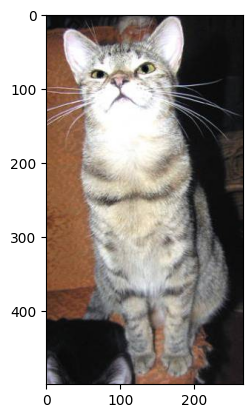

In [9]:
#Displaying the image of cat
img = mpimg.imread('/content/drive/MyDrive/dataset/DOG_CAT_HORSE_HUMAN/Cats/cat.526.jpg')
plt.imshow(img)

In [10]:
type(img)

numpy.ndarray

In [11]:
img.shape

(500, 266, 3)

In [12]:
os.mkdir('/content/resized_image_Cat')

In [13]:
original_folder = '/content/drive/MyDrive/dataset/DOG_CAT_HORSE_HUMAN/Cats/'
resized_folder = '/content/resized_image_Cat/'

for i in range(830):
  filename = os.listdir(original_folder)[i]
  image_path = original_folder + filename

  image = Image.open(image_path)
  image = image.resize((224, 224))
  image = image.convert('RGB')

  new_image_path = resized_folder + filename
  image.save(new_image_path)

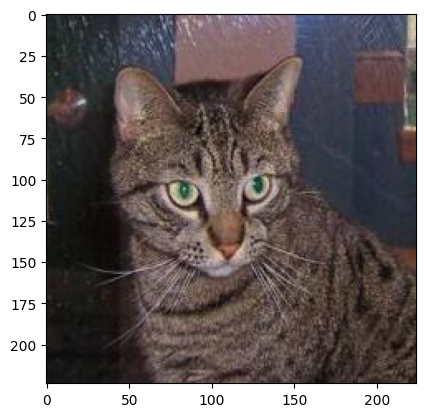

In [14]:
#Displaying the resized image of cat
img_Cat_resized = mpimg.imread('/content/resized_image_Cat/cat.1.jpg')
plt.imshow(img_Cat_resized)

In [15]:
type(img_Cat_resized)

numpy.ndarray

In [16]:
img_Cat_resized.shape

(224, 224, 3)

In [17]:
# Converting the resized images into ndarrays
image_directory = '/content/resized_image_Cat/'
image_extension = ['jpg', 'png']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

array_images_Cat = np.asarray([cv.imread(file) for file in files])

In [18]:
print(array_images_Cat)

[[[[ 36  12  22]
   [ 51  27  37]
   [ 53  29  39]
   ...
   [135 118 182]
   [133 116 180]
   [126 109 173]]

  [[ 36  12  22]
   [ 51  27  37]
   [ 53  29  39]
   ...
   [130 113 177]
   [124 107 171]
   [119 102 166]]

  [[ 35  11  21]
   [ 50  26  36]
   [ 51  27  37]
   ...
   [129 112 176]
   [119 102 166]
   [116  99 163]]

  ...

  [[ 15   4  12]
   [ 19   8  16]
   [ 21  10  18]
   ...
   [ 25  11  15]
   [ 25  11  15]
   [ 25  11  15]]

  [[ 12   4  11]
   [ 15   7  14]
   [ 18  10  17]
   ...
   [ 25  11  15]
   [ 25  11  15]
   [ 25  11  15]]

  [[ 14   6  13]
   [ 17   9  16]
   [ 19  11  18]
   ...
   [ 25  11  15]
   [ 25  11  15]
   [ 25  11  15]]]


 [[[ 69  65  54]
   [ 64  60  49]
   [ 62  59  45]
   ...
   [ 96  92  73]
   [ 97  94  73]
   [118 115  94]]

  [[ 68  64  53]
   [ 64  60  49]
   [ 62  59  45]
   ...
   [100  96  77]
   [105 102  81]
   [115 112  91]]

  [[ 66  62  51]
   [ 63  59  48]
   [ 63  60  46]
   ...
   [107 103  84]
   [114 110  91]
   [108 104

In [19]:
type(array_images_Cat)

numpy.ndarray

In [20]:
array_images_Cat.shape

(830, 224, 224, 3)

In [21]:
# Creating lable names

y_Cat = np.empty(830)
y_Cat.fill(0)

In [22]:
y_Cat = y_Cat.astype(int)

In [23]:
y_Cat.shape

(830,)

In [24]:
type(y_Cat)

numpy.ndarray

In [25]:
print(y_Cat)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

**Converting Dog images into ndarray and labeling**

In [26]:
os.chdir('/content/drive/MyDrive/dataset/DOG_CAT_HORSE_HUMAN')

In [27]:
os.chdir('Dogs')

In [28]:
os.listdir('.')

['dog.10.jpg',
 'dog.1.jpg',
 'dog.100.jpg',
 'dog.102.jpg',
 'dog.101.jpg',
 'dog.103.jpg',
 'dog.104.jpg',
 'dog.106.jpg',
 'dog.105.jpg',
 'dog.107.jpg',
 'dog.108.jpg',
 'dog.109.jpg',
 'dog.11.jpg',
 'dog.111.jpg',
 'dog.110.jpg',
 'dog.112.jpg',
 'dog.113.jpg',
 'dog.115.jpg',
 'dog.114.jpg',
 'dog.116.jpg',
 'dog.117.jpg',
 'dog.119.jpg',
 'dog.118.jpg',
 'dog.120.jpg',
 'dog.12.jpg',
 'dog.121.jpg',
 'dog.122.jpg',
 'dog.123.jpg',
 'dog.126.jpg',
 'dog.124.jpg',
 'dog.125.jpg',
 'dog.127.jpg',
 'dog.128.jpg',
 'dog.13.jpg',
 'dog.130.jpg',
 'dog.129.jpg',
 'dog.131.jpg',
 'dog.133.jpg',
 'dog.132.jpg',
 'dog.134.jpg',
 'dog.136.jpg',
 'dog.135.jpg',
 'dog.138.jpg',
 'dog.137.jpg',
 'dog.14.jpg',
 'dog.139.jpg',
 'dog.140.jpg',
 'dog.141.jpg',
 'dog.143.jpg',
 'dog.142.jpg',
 'dog.144.jpg',
 'dog.145.jpg',
 'dog.146.jpg',
 'dog.147.jpg',
 'dog.148.jpg',
 'dog.15.jpg',
 'dog.149.jpg',
 'dog.150.jpg',
 'dog.151.jpg',
 'dog.152.jpg',
 'dog.153.jpg',
 'dog.155.jpg',
 'dog.154.jpg',


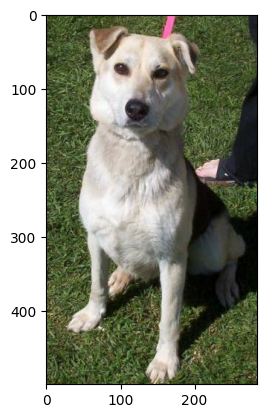

In [29]:
#Displaying the image of dog
img_dog = mpimg.imread('/content/drive/MyDrive/dataset/DOG_CAT_HORSE_HUMAN/Dogs/dog.90(1).jpg')
plt.imshow(img_dog)

In [30]:
len(os.listdir('.'))

830

In [31]:
type(img_dog)

numpy.ndarray

In [32]:
img_dog.shape

(499, 285, 3)

In [33]:
os.mkdir('/content/resized_image_Dogs')

In [34]:
original_folder = '/content/drive/MyDrive/dataset/DOG_CAT_HORSE_HUMAN/Dogs/'
resized_folder = '/content/resized_image_Dogs/'

for i in range(830):
  filename = os.listdir(original_folder)[i]
  image_path = original_folder + filename

  image = Image.open(image_path)
  image = image.resize((224, 224))
  image = image.convert('RGB')

  new_image_path = resized_folder + filename
  image.save(new_image_path)

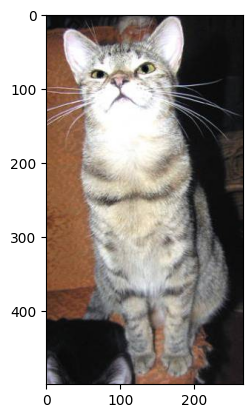

In [35]:
#Displaying the Resized image of dog
img_Dog_resized = mpimg.imread('/content/resized_image_Dogs/dog.90.jpg')
plt.imshow(img)

In [36]:
type(img_Dog_resized)

numpy.ndarray

In [37]:
img_Dog_resized.shape

(224, 224, 3)

In [38]:
# Converting the resized images into ndarrays
image_directory = '/content/resized_image_Dogs/'
image_extension = ['jpg', 'png']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

array_images_Dog = np.asarray([cv.imread(file) for file in files])

In [39]:
print(array_images_Dog)

[[[[142 179 187]
   [151 188 196]
   [155 191 201]
   ...
   [ 48  47  49]
   [ 41  36  37]
   [ 39  33  34]]

  [[129 166 174]
   [108 145 153]
   [154 190 200]
   ...
   [ 41  41  41]
   [ 42  37  38]
   [ 46  40  41]]

  [[104 140 150]
   [105 141 151]
   [120 156 166]
   ...
   [ 31  33  33]
   [ 35  33  33]
   [ 45  41  40]]

  ...

  [[145 184 193]
   [162 201 210]
   [138 177 186]
   ...
   [135 155 172]
   [105 125 142]
   [ 94 114 131]]

  [[130 169 177]
   [151 190 198]
   [137 176 184]
   ...
   [127 147 164]
   [125 145 162]
   [132 152 169]]

  [[124 163 171]
   [141 180 188]
   [135 174 182]
   ...
   [133 153 170]
   [134 154 171]
   [122 142 159]]]


 [[[120 147 167]
   [118 145 165]
   [118 145 165]
   ...
   [ 78  97 105]
   [ 67  88  96]
   [ 51  72  80]]

  [[119 146 166]
   [118 145 165]
   [119 146 166]
   ...
   [ 77  96 104]
   [ 64  85  93]
   [ 44  65  73]]

  [[122 149 169]
   [121 148 168]
   [122 149 169]
   ...
   [ 74  93 101]
   [ 59  80  88]
   [ 34  55

In [40]:
type(array_images_Dog)

numpy.ndarray

In [41]:
array_images_Dog.shape

(830, 224, 224, 3)

In [42]:
# Creating lable names

y_Dog = np.empty(830)
y_Dog.fill(1)

In [43]:
y_Dog = y_Dog.astype(int)

In [44]:
y_Dog.shape

(830,)

In [45]:
type(y_Dog)

numpy.ndarray

In [46]:
print(y_Dog)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [47]:
os.chdir('/content/drive/MyDrive/dataset/DOG_CAT_HORSE_HUMAN')

In [48]:
os.chdir('Horses')

In [49]:
os.listdir('.')

['horse-102.jpg',
 'horse-103.jpg',
 'horse-10.jpg',
 'horse-100.jpg',
 'horse-1.jpg',
 'horse-101.jpg',
 'horse-117.jpg',
 'horse-116.jpg',
 'horse-108.jpg',
 'horse-111.jpg',
 'horse-112.jpg',
 'horse-107.jpg',
 'horse-11.jpg',
 'horse-106.jpg',
 'horse-104.jpg',
 'horse-109.jpg',
 'horse-115.jpg',
 'horse-118.jpg',
 'horse-113.jpg',
 'horse-114.jpg',
 'horse-105.jpg',
 'horse-110.jpg',
 'horse-125.jpg',
 'horse-128.jpg',
 'horse-121.jpg',
 'horse-126.jpg',
 'horse-122.jpg',
 'horse-120.jpg',
 'horse-12.jpg',
 'horse-127.jpg',
 'horse-124.jpg',
 'horse-119.jpg',
 'horse-129.jpg',
 'horse-123.jpg',
 'horse-138.jpg',
 'horse-139.jpg',
 'horse-14.jpg',
 'horse-136.jpg',
 'horse-132.jpg',
 'horse-130.jpg',
 'horse-140.jpg',
 'horse-135.jpg',
 'horse-134.jpg',
 'horse-137.jpg',
 'horse-13.jpg',
 'horse-131.jpg',
 'horse-133.jpg',
 'horse-148.jpg',
 'horse-146.jpg',
 'horse-145.jpg',
 'horse-143.jpg',
 'horse-147.jpg',
 'horse-142.jpg',
 'horse-141.jpg',
 'horse-149.jpg',
 'horse-144.jpg',

In [50]:
len(os.listdir('.'))

835

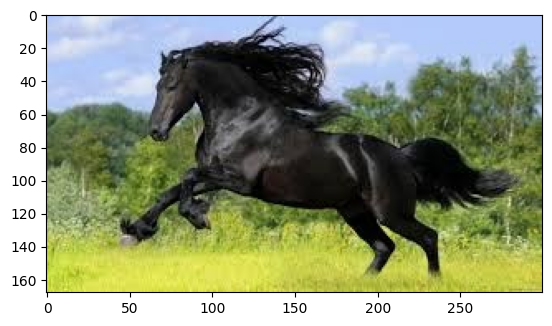

In [51]:
#Displaying the image of horse
img_horse = mpimg.imread('/content/drive/MyDrive/dataset/DOG_CAT_HORSE_HUMAN/Horses/horse-103.jpg')
plt.imshow(img_horse)

In [52]:
type(img_horse)

numpy.ndarray

In [53]:
img_horse.shape

(168, 300, 3)

In [54]:
os.mkdir('/content/resized_image_Horses')

In [55]:
original_folder = '/content/drive/MyDrive/dataset/DOG_CAT_HORSE_HUMAN/Horses/'
resized_folder = '/content/resized_image_Horses/'

for i in range(830):
  filename = os.listdir(original_folder)[i]
  image_path = original_folder + filename

  image = Image.open(image_path)
  image = image.resize((224, 224))
  image = image.convert('RGB')

  new_image_path = resized_folder + filename
  image.save(new_image_path)

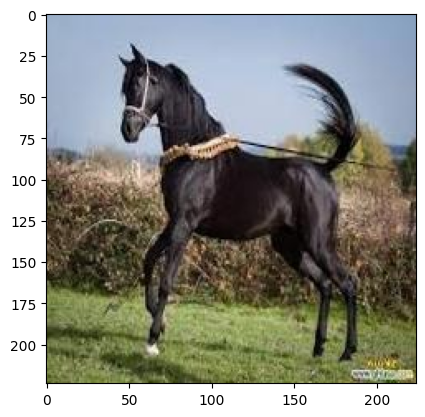

In [56]:
#Displaying the Resized image of horse
img_Horse_resized = mpimg.imread('/content/resized_image_Horses/horse-102.jpg')
plt.imshow(img_Horse_resized)

In [57]:
type(img_Horse_resized)

numpy.ndarray

In [58]:
img_Horse_resized.shape

(224, 224, 3)

In [59]:
# Converting the resized images into ndarrays
image_directory = '/content/resized_image_Horses/'
image_extension = ['jpg', 'png']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

array_images_Horse = np.asarray([cv.imread(file) for file in files])

In [60]:
print(array_images_Horse)

[[[[195 102  57]
   [195 102  57]
   [195 102  57]
   ...
   [222 150 110]
   [219 147 107]
   [216 144 104]]

  [[195 102  57]
   [195 102  57]
   [196 103  58]
   ...
   [223 151 111]
   [222 150 110]
   [219 147 107]]

  [[195 102  57]
   [196 103  58]
   [196 103  58]
   ...
   [224 154 114]
   [225 153 113]
   [223 151 111]]

  ...

  [[ 19  36  69]
   [ 75  92 125]
   [ 53  70 103]
   ...
   [ 91 114 146]
   [102 125 157]
   [ 90 115 147]]

  [[ 16  33  66]
   [ 65  82 115]
   [ 50  67 100]
   ...
   [101 124 156]
   [109 134 166]
   [ 89 117 148]]

  [[ 32  49  82]
   [ 56  73 106]
   [ 40  57  90]
   ...
   [104 129 161]
   [109 134 166]
   [ 86 114 145]]]


 [[[131 128 123]
   [190 187 182]
   [251 248 243]
   ...
   [251 243 213]
   [247 239 209]
   [244 236 206]]

  [[162 159 154]
   [191 188 183]
   [241 238 233]
   ...
   [249 241 211]
   [247 239 209]
   [245 237 207]]

  [[211 209 201]
   [220 218 210]
   [252 250 242]
   ...
   [248 239 206]
   [249 239 209]
   [248 238

In [61]:
type(array_images_Horse)

numpy.ndarray

In [62]:
array_images_Horse.shape

(830, 224, 224, 3)

In [63]:
# Creating lable names

y_Horse = np.empty(830)
y_Horse.fill(2)

In [64]:
y_Horse = y_Horse.astype(int)

In [65]:
y_Horse.shape

(830,)

In [66]:
type(y_Horse)

numpy.ndarray

In [67]:
print(y_Horse)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

**Converting Human images into ndarray and labeling**

In [68]:
os.chdir('/content/drive/MyDrive/dataset/DOG_CAT_HORSE_HUMAN')

In [69]:
os.chdir('Humans')

In [70]:
os.listdir('.')

['rider-108.jpg',
 'rider-107.jpg',
 'rider-106.jpg',
 'rider-105.jpg',
 'rider-101.jpg',
 'rider-102.jpg',
 'rider-100.jpg',
 'rider-109.jpg',
 'rider-10.jpg',
 'rider-104.jpg',
 'rider-1.jpg',
 'rider-103.jpg',
 'rider-12.jpg',
 'rider-127.jpg',
 'rider-113.jpg',
 'rider-133.jpg',
 'rider-124.jpg',
 'rider-118.jpg',
 'rider-128.jpg',
 'rider-116.jpg',
 'rider-111.jpg',
 'rider-132.jpg',
 'rider-120.jpg',
 'rider-112.jpg',
 'rider-13.jpg',
 'rider-130.jpg',
 'rider-115.jpg',
 'rider-123.jpg',
 'rider-11.jpg',
 'rider-126.jpg',
 'rider-125.jpg',
 'rider-121.jpg',
 'rider-114.jpg',
 'rider-131.jpg',
 'rider-110.jpg',
 'rider-117.jpg',
 'rider-119.jpg',
 'rider-122.jpg',
 'rider-129.jpg',
 'rider-139.jpg',
 'rider-142.jpg',
 'rider-144.jpg',
 'rider-146.jpg',
 'rider-141.jpg',
 'rider-137.jpg',
 'rider-138.jpg',
 'rider-143.jpg',
 'rider-14.jpg',
 'rider-147.jpg',
 'rider-145.jpg',
 'rider-135.jpg',
 'rider-140.jpg',
 'rider-134.jpg',
 'rider-136.jpg',
 'rider-149.jpg',
 'rider-166.jpg',

In [71]:
len(os.listdir('.'))

830

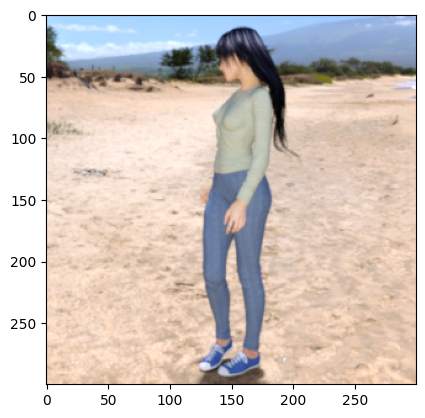

In [72]:
#Displaying the image of human
img_human = mpimg.imread('/content/drive/MyDrive/dataset/DOG_CAT_HORSE_HUMAN/Humans/human01-02.png')
plt.imshow(img_human)

In [73]:
type(img_human)

numpy.ndarray

In [74]:
img_human.shape

(300, 300, 4)

In [75]:
os.mkdir('/content/resized_image_Humans')

In [76]:
original_folder = '/content/drive/MyDrive/dataset/DOG_CAT_HORSE_HUMAN/Humans/'
resized_folder = '/content/resized_image_Humans/'

for i in range(830):
  filename = os.listdir(original_folder)[i]
  image_path = original_folder + filename

  image = Image.open(image_path)
  image = image.resize((224, 224))
  image = image.convert('RGB')

  new_image_path = resized_folder + filename
  image.save(new_image_path)

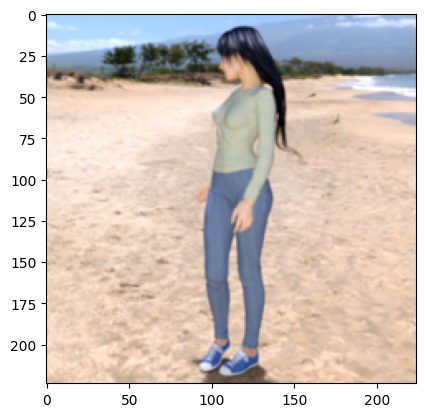

In [77]:
#Displaying the Resized image of human
img_resized_human = mpimg.imread('/content/resized_image_Humans/human01-04.png')
plt.imshow(img_resized_human)

In [78]:
type(img_resized_human)

numpy.ndarray

In [79]:
img_resized_human.shape

(224, 224, 3)

In [80]:
# Converting the resized images into ndarrays
image_directory = '/content/resized_image_Humans/'
image_extension = ['jpg', 'png']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

array_images_Human = np.asarray([cv.imread(file) for file in files])

In [81]:
print(array_images_Human)

[[[[ 29  38  51]
   [ 39  48  61]
   [ 41  53  65]
   ...
   [135 164 191]
   [135 165 190]
   [135 165 190]]

  [[ 27  36  49]
   [ 30  42  54]
   [ 32  44  56]
   ...
   [134 163 190]
   [135 165 190]
   [136 166 191]]

  [[ 28  40  50]
   [ 26  41  50]
   [ 25  39  51]
   ...
   [130 160 187]
   [133 164 189]
   [134 165 190]]

  ...

  [[178 178 184]
   [182 181 190]
   [181 182 192]
   ...
   [159 172 180]
   [162 175 183]
   [163 176 184]]

  [[172 172 178]
   [165 165 171]
   [174 176 184]
   ...
   [161 174 182]
   [163 176 184]
   [164 177 185]]

  [[180 180 186]
   [172 172 178]
   [193 196 201]
   ...
   [165 178 186]
   [167 180 188]
   [168 181 189]]]


 [[[170 192 204]
   [169 192 207]
   [166 191 207]
   ...
   [101 136 156]
   [100 136 154]
   [ 99 137 155]]

  [[170 192 204]
   [169 192 207]
   [166 191 207]
   ...
   [101 136 156]
   [100 136 154]
   [ 99 137 155]]

  [[170 192 204]
   [169 192 207]
   [166 191 207]
   ...
   [101 136 156]
   [100 136 154]
   [ 99 137

In [82]:
type(array_images_Human)

numpy.ndarray

In [83]:
array_images_Human.shape

(830, 224, 224, 3)

In [84]:
y_Human = np.empty(830)
y_Human.fill(3)

In [85]:
y_Human = y_Human.astype(int)

In [86]:
type(y_Human)

numpy.ndarray

In [87]:
y_Human.shape

(830,)

In [88]:
print(y_Human)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 

In [89]:
X = np.concatenate([array_images_Cat, array_images_Dog, array_images_Horse, array_images_Human])

In [90]:
X.shape

(3320, 224, 224, 3)

In [91]:
Y = np.concatenate([y_Cat, y_Dog, y_Horse, y_Human])

In [92]:
Y.shape

(3320,)

In [93]:
x_train = X
y_train = Y

In [94]:
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size=0.2, random_state=2)

In [95]:
# Scalling
X_train = X_train.astype('float')/255
X_test =  X_test.astype('float')/255

Y_train = to_categorical(Y_train, num_classes=4)
Y_test = to_categorical(Y_test, num_classes=4)

In [96]:
Y_train[0:100]

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],


In [97]:
X_train[0]

array([[[0.22352941, 0.34117647, 0.26666667],
        [0.22352941, 0.34117647, 0.26666667],
        [0.22352941, 0.33333333, 0.25882353],
        ...,
        [0.13333333, 0.24313725, 0.0627451 ],
        [0.12941176, 0.23921569, 0.05882353],
        [0.1254902 , 0.23529412, 0.05490196]],

       [[0.22352941, 0.34117647, 0.26666667],
        [0.22352941, 0.34117647, 0.26666667],
        [0.22352941, 0.33333333, 0.25882353],
        ...,
        [0.13333333, 0.24313725, 0.0627451 ],
        [0.12941176, 0.23921569, 0.05882353],
        [0.1254902 , 0.23529412, 0.05490196]],

       [[0.22352941, 0.34117647, 0.26666667],
        [0.21960784, 0.3372549 , 0.2627451 ],
        [0.21960784, 0.32941176, 0.25490196],
        ...,
        [0.12941176, 0.24313725, 0.0627451 ],
        [0.1254902 , 0.23921569, 0.05882353],
        [0.12156863, 0.23529412, 0.05490196]],

       ...,

       [[0.71372549, 0.74117647, 0.81960784],
        [0.67843137, 0.70588235, 0.78431373],
        [0.65490196, 0

**VGG 16**

In [99]:
import keras
import os
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
# from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [100]:
X_train_vgg, X_test_vgg, Y_train_vgg, Y_test_vgg  = train_test_split(X, Y, test_size=0.3, random_state=2)

In [101]:
VGG = keras.applications.VGG16(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')
VGG.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


**ADAM**

In [109]:
# Define the input shape explicitly for the model
input_shape = (224, 224, 3)  # Match the VGG input shape

model_vgg = keras.Sequential([
    keras.layers.InputLayer(input_shape=input_shape), # Add an InputLayer to define the input shape
    VGG,
    keras.layers.Flatten(),
    keras.layers.Dense(units = 224, activation = 'relu'),
    keras.layers.Dense(units = 224, activation = 'relu'),
    keras.layers.Dense(units = 4, activation = 'softmax')
])

model_vgg.compile(optimizer = 'Adam', loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

model_vgg.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 224)                 │       5,619,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 224)                 │          50,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │             900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,385,924 (77.77 MB)

 Trainable params: 5,671,236 (21.63 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [110]:
history = model_vgg.fit(X_train,Y_train, validation_data=(X_test,Y_test), epochs=15)

Epoch 1/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 50s 407ms/step - accuracy: 0.7032 - loss: 0.9669 - val_accuracy: 0.8946 - val_loss: 0.2575
Epoch 2/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 47s 163ms/step - accuracy: 0.9648 - loss: 0.0898 - val_accuracy: 0.9473 - val_loss: 0.1649
Epoch 3/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 20s 160ms/step - accuracy: 0.9934 - loss: 0.0328 - val_accuracy: 0.9066 - val_loss: 0.2880
Epoch 4/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 16s 191ms/step - accuracy: 0.9936 - loss: 0.0272 - val_accuracy: 0.9398 - val_loss: 0.1941
Epoch 5/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 20s 189ms/step - accuracy: 0.9999 - loss: 0.0049 - val_accuracy: 0.9142 - val_loss: 0.3295
Epoch 6/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 21s 192ms/step - accuracy: 0.9943 - loss: 0.0178 - val_accuracy: 0.9473 - val_loss: 0.2077
Epoch 7/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 18s 162ms/step - accuracy: 0.9942 - loss: 0.0175 - val_accuracy: 0.9307 - val_loss: 0.2400
Epoch 8/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 20s 161ms/step - accuracy: 0.9984 - loss: 0.0064 - val_accu

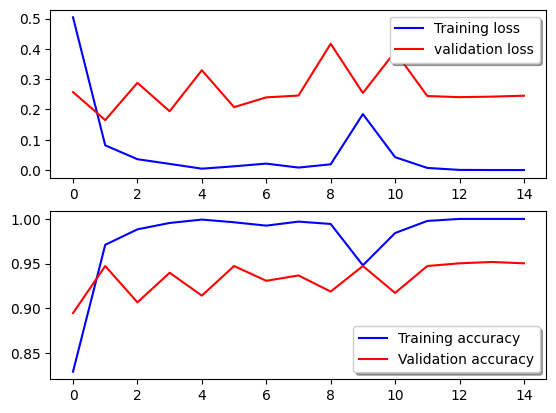

In [111]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

**RMSPROP**

In [ ]:
model_vgg.compile(optimizer = 'RMSprop', loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [ ]:
model_vgg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 21,204,292
Trainable params: 6,489,604
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
history = model_vgg.fit(X_train,Y_train, validation_data=(X_test,Y_test), epochs=15)

Epoch 1/15
84/84 [==============================] - 32s 256ms/step - loss: 1.4968 - accuracy: 0.6805 - val_loss: 0.2963 - val_accuracy: 0.8846
Epoch 2/15
84/84 [==============================] - 17s 203ms/step - loss: 0.3529 - accuracy: 0.8819 - val_loss: 0.6015 - val_accuracy: 0.8216
Epoch 3/15
84/84 [==============================] - 18s 218ms/step - loss: 0.2006 - accuracy: 0.9183 - val_loss: 0.2859 - val_accuracy: 0.8996
Epoch 4/15
84/84 [==============================] - 19s 228ms/step - loss: 0.1152 - accuracy: 0.9599 - val_loss: 0.1857 - val_accuracy: 0.9460
Epoch 5/15
84/84 [==============================] - 19s 223ms/step - loss: 0.1020 - accuracy: 0.9651 - val_loss: 0.3274 - val_accuracy: 0.9070
Epoch 6/15
84/84 [==============================] - 18s 216ms/step - loss: 0.0988 - accuracy: 0.9738 - val_loss: 0.3369 - val_accuracy: 0.9190
Epoch 7/15
84/84 [==============================] - 18s 214ms/step - loss: 0.0433 - accuracy: 0.9865 - val_loss: 0.7539 - val_accuracy: 0.8726

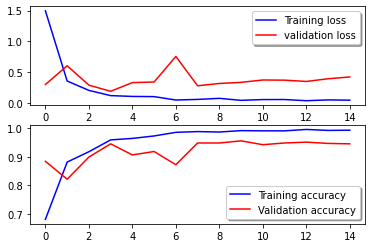

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

**SGD**

In [ ]:
model_vgg.compile(optimizer = 'SGD', loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [ ]:
model_vgg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 21,204,292
Trainable params: 6,489,604
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
history = model_vgg.fit(X_train,Y_train, validation_data=(X_test,Y_test), epochs=15)

Epoch 1/15
84/84 [==============================] - 29s 248ms/step - loss: 1.1426 - accuracy: 0.5152 - val_loss: 1.5452 - val_accuracy: 0.5157
Epoch 2/15
84/84 [==============================] - 17s 198ms/step - loss: 0.6278 - accuracy: 0.7510 - val_loss: 0.5743 - val_accuracy: 0.6987
Epoch 3/15
84/84 [==============================] - 17s 203ms/step - loss: 0.4627 - accuracy: 0.8020 - val_loss: 0.3556 - val_accuracy: 0.8636
Epoch 4/15
84/84 [==============================] - 18s 209ms/step - loss: 0.3595 - accuracy: 0.8523 - val_loss: 0.2781 - val_accuracy: 0.9100
Epoch 5/15
84/84 [==============================] - 18s 217ms/step - loss: 0.2776 - accuracy: 0.8898 - val_loss: 0.5343 - val_accuracy: 0.7976
Epoch 6/15
84/84 [==============================] - 19s 221ms/step - loss: 0.2295 - accuracy: 0.9134 - val_loss: 0.2462 - val_accuracy: 0.9160
Epoch 7/15
84/84 [==============================] - 18s 214ms/step - loss: 0.1724 - accuracy: 0.9344 - val_loss: 0.3605 - val_accuracy: 0.8441

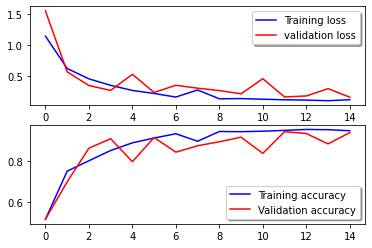

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

**Prediction**

path of the image to be predicted: /content/dog_download.jpeg


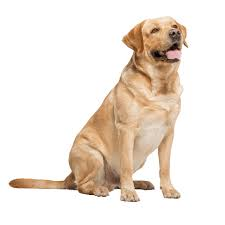

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[5.4913134e-08 9.9999499e-01 4.9737928e-06 3.8740776e-08]]
1
The Image Represents Dog


In [115]:
import cv2
from google.colab.patches import cv2_imshow
input_image_path = input("path of the image to be predicted: ")
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image, (224, 224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])
input_prediction = model_vgg.predict(image_reshaped)
print(input_prediction)
input_predict_label = np.argmax(input_prediction)
print(input_predict_label)

if input_predict_label == 0:
  print("The Image Represents Cat")
elif input_predict_label == 1:
  print("The Image Represents Dog")
elif input_predict_label == 2:
  print("The Image Represents Horse")
else:
  print("The Image Represents Human")